# Let's test your implementation of KNN 

In [1]:
# import your class on KNN
from KNN_andrea import KNN



In [2]:
assert KNN is not None, 'KNN should be imported'
assert 'fit' in dir(KNN) and 'predict' in dir(KNN), 'Your implementation should follow the sklearn standards (fit and predict methods)'

In [3]:
# Quick test
import numpy as np
X = np.array([[0], [1], [2], [3]])
y = np.array([0, 0, 1, 1])

knn = KNN(k=3)
knn.fit(X, y)
knn.predict(np.array([[1.1], [4]]))

[0, 1]

# Pick 3 Datasets
Either from the /datasets available in github (which should be familiar from last week) or by directly downloading any 3 datasets from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

# Import Dataset1:

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# Note: If you implemented Knn for one feature and one label only, you will have to trim the dataset.
# BONUS: Extend your Knn Algorithm to be valid for any size of features in your dataset. 
# BONUS2: Create a function in your original knn class to calculate the time it takes to execute from start to finish. 

## Load your data into X and y

In [5]:
# load your data into X and y numpy arrays
data = pd.read_csv('seeds.csv')

In [6]:
data.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama wheat


In [7]:
X = data.drop('grain_variety', axis=1).values
y = data.grain_variety.values.reshape(-1, 1)

print(X.shape)
print(y.shape)

(210, 7)
(210, 1)


In [8]:
assert X is not None and type(X) == np.ndarray, 'X should be defined and be a numpy array'
assert y is not None and type(y) == np.ndarray, 'y should be defined and be a numpy array'

## Plot X showing the class

example
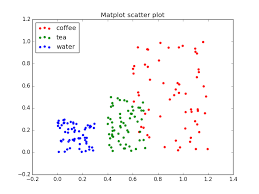

<AxesSubplot:xlabel='length', ylabel='width'>

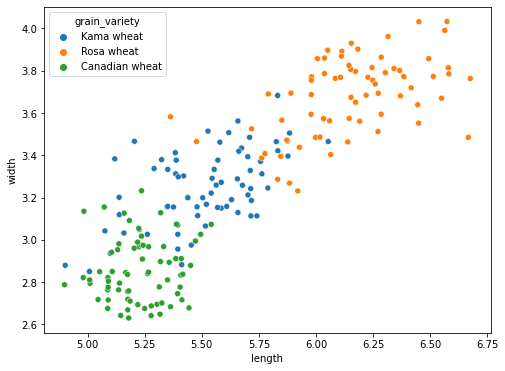

In [9]:
# plot X showing the classes hold in y
plt.figure(figsize=(8, 6))
sns.scatterplot(x = data['length'], y = data['width'], hue = data['grain_variety'])

## Fit the model

In [10]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
model = KNN(k=5)
model.fit(X_train, y_train)


In [13]:
assert model is not None and type(model) == KNN, 'Fit method should return itself'

## Predict the classes for the same data

In [13]:
model.predict(X)

AttributeError: 'NoneType' object has no attribute 'predict'

## Show the decission boundaries depending on K for your model
example
<img src="https://i.stack.imgur.com/ZDVhm.png" width="300"/>
(tricky one so we are going to help you out with this one)

In [ ]:
from ipywidgets import interact

@interact
def plot_decision_boundary(k=(1,10,1)):
    model = KNN(n_neighbors=k).fit(X, y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                         np.arange(y_min, y_max, 0.5))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z)

    for c in set(y):
        plt.scatter(*X[y==c].T)

# Repeat this process with Dataset 2 and Dataset 3

# Compare performance vs Sklearn